In [1]:
import pandas as pd
import glob
import os
import numpy as np

from functions import *
from plots import *

The aim of this notebook is to visualise relationships between performance in the two-step task and mental-health/cognitive dimensions.

Draft analysis

1. Reproduce Fig 2B from Donegan looking at the probability of staying given the previous reward

1. Correlation IQ and MB index
2. Correlation age and MB index
2. Correlation of all mental health scores with MB index

In [14]:
# Load fully merged data frames

# Load demographic and questionnaires results
dem_quest_dfs = load_data("Overall_Results/Dem_Quest")

# Load raw TST results
tst_dfs = load_data("Overall_Results/Two_Step_Task_Results")

# Load modelling results
modelling_dfs = load_data("Overall_Results/Models")

# Set study to look at
study = "pilot_09_07_25"


MAKE SURE THAT THE PREDICTOR SITUATION IS CLEAR, IE GILLAN USES STAY FOR THE SYMPTOM MODEL WHILE DONEGAN USES THE MB VALUE SO IT DIVIDES THE MODEL IN 2 PARTS, IT NEEDS TO BE CLEAR IN THE DT WHAT IS THE COEFFIVCIENT ORIGINATING FORM 

The following data frame contains the coefficients of the base model **currStay ~ lastWinRew * lastTranUnc + (lastWinRew * lastTranUnc + 1 | participant_id)** used by Gillan et al. (2016). It provides estimates for the coefficients of "stay", "modelFree", "transition" and "modelBased". These coefficients can be combined with participants age or mental health results to build normative models.

In [15]:

modelling_dfs[f'model_results_gillan_baseline_glmer_{study}']

,stay,modelFree,transition,modelBased,participant_id
0,0.183629,0.430831,0.032338,-0.052264,572bcdbb34b25a0010ddd977
1,1.947810,-0.195449,0.163100,0.477872,66d31a1b0515fe747830bab9


The following data frame looks at how different mental health disorders can be related to modelBased fixed effect. It has been used in Gillan et al. (2016) paper in Table 1.

The model that was ran to obtain these results is: 

**currStay ~ lastWinRew * lastTranUnc * symptom + lastWinRew * lastTranUnc * (iq_z + age_z + gender) + (lastWinRew * lastTranUnc + 1 | participant_id)**

In [ ]:
modelling_dfs[f'model_results_gillan_symptom_glmer_{study}']

,Questionnaire,Coefficient,SE,Z_value,P_value
0,Eating Disorders,-0.279025,0.180450,-1.546277,0.122038
1,Impulsivity,0.279025,0.180451,1.546269,0.122040
2,OCD,0.279026,0.180454,1.546243,0.122046
3,Alcohol Addiction,0.279026,0.180451,1.546265,0.122041
4,Schizotypy,0.279026,0.180451,1.546265,0.122041
5,Depression,-0.279025,0.180450,-1.546277,0.122038
6,Trait Anxiety,-0.279026,0.180452,-1.546263,0.122041
7,Apathy,-0.279025,0.180450,-1.546277,0.122038
8,Social Anxiety,0.279025,0.180451,1.546269,0.122040


In [16]:
modelling_dfs[f'model_results_donegan_demographic_lm_{study}']

,Estimate,Std. Error,t value,Pr(>|t|),Predictor
0,0.212804,1.584852e-16,1342737444182509,0,(Intercept)
1,0.265402,1.586846e-16,1672511512073764,0,age_z


In [ ]:
modelling_dfs['model_results_donegan_symptom_lm_pilot_09_07_25']

,Questionnaire,Coefficient,SE,T_value,P_value
0,Eating Disorders,-0.265402,1.613319e-16,-1645067208008169,0
1,Impulsivity,0.265402,1.597028e-16,1661848827597601,0
2,OCD,0.265402,1.586846e-16,1672511512073764,0
3,Alcohol Addiction,0.265402,1.613319e-16,1645067208008169,0
4,Schizotypy,0.265402,1.613319e-16,1645067208008169,0
5,Depression,-0.265402,1.613319e-16,-1645067208008169,0
6,Trait Anxiety,-0.265402,1.586846e-16,-1672511512073764,0
7,Apathy,-0.265402,1.613319e-16,-1645067208008169,0
8,Social Anxiety,0.265402,1.597028e-16,1661848827597601,0


### 1. Reproduce Fig 2B from Donegan et al. (2024) looking at the probability of staying given the previous reward


In [3]:

# Group staying data by participant, last reward, last transition and calcuate the probability of staying
grouped_data = group_mb_data(tst_dfs['TST_results_pilot_09_07_25'], ["participant_id","lastWinRew", "lastTranUnc"], "currStay")

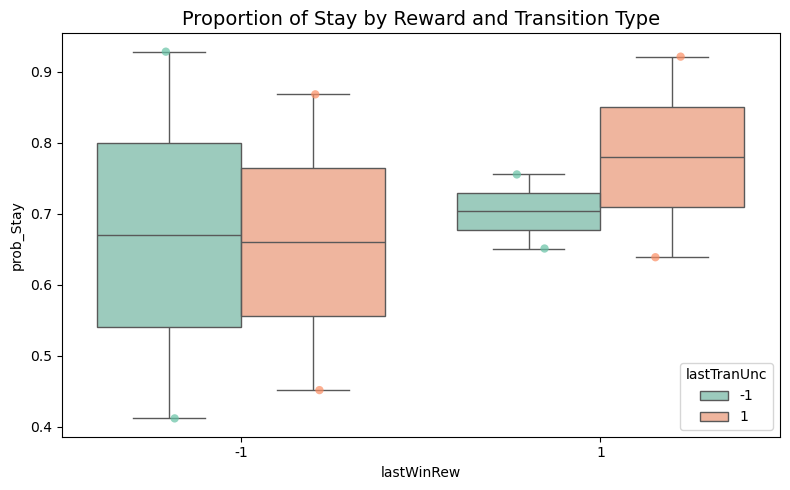

In [4]:
# Plot the proportion of stay by reward and transition type for each participant
box_plots(grouped_data, "lastWinRew", "prob_Stay", "lastTranUnc", "Proportion of Stay by Reward and Transition Type", palette="Set2")

### 2. Reproduce Fig 3D from Donegan et al. (2024) looking at association of model-based learning with individual differences: age, gender, and education



In [5]:
modelling_dfs['model_results_donegan_demographic_lm_pilot_09_07_25']

,Estimate,Std. Error,t value,Pr(>|t|),Predictor
0,0.212804,1.584852e-16,1342737444182509,0,(Intercept)
1,0.265402,1.586846e-16,1672511512073764,0,age_z


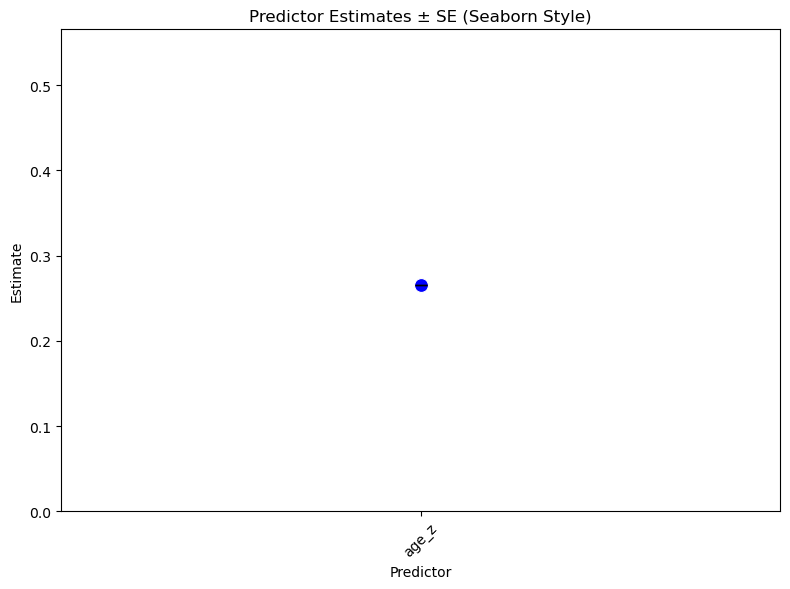

In [6]:
point_plot(modelling_dfs['model_results_donegan_demographic_lm_pilot_09_07_25'])

### 3. Reproduce Fig 3E from Donegan et al. (2024) looking at looking at association of model-based learning with mental health symptoms

In [7]:
point_plot(modelling_dfs['model_results_gillan_symptom_glmer_pilot_09_07_25'])

KeyError: 'Predictor'